### Laptop_Price_Prediction

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

#### reading the .csv file(laptop_data_cleaned) to data variable

In [2]:
data=pd.read_csv(r"C:\ML\laptop_data_cleaned.csv")

#### displaying the top n elements of the dataframe 

In [3]:
data.head(5)
#ppi-pixel_per_inch,ssd-solidStateDrive
#ips-inplane_switching,hdd-hardDiscDrive

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


#### information about the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


#### discription of the data in dataframe

In [5]:
data.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


#### displaying no of null values in the each column of the dataframe

In [6]:
data.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

#### array of unique elements of company column in dataframe

In [7]:
data["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [8]:
data["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [9]:
data["Gpu_brand"].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

In [10]:
data["Cpu_brand"].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

In [11]:
data["Ram"].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

#### ploting the price difference of the each company's laptops using bar graph

[]

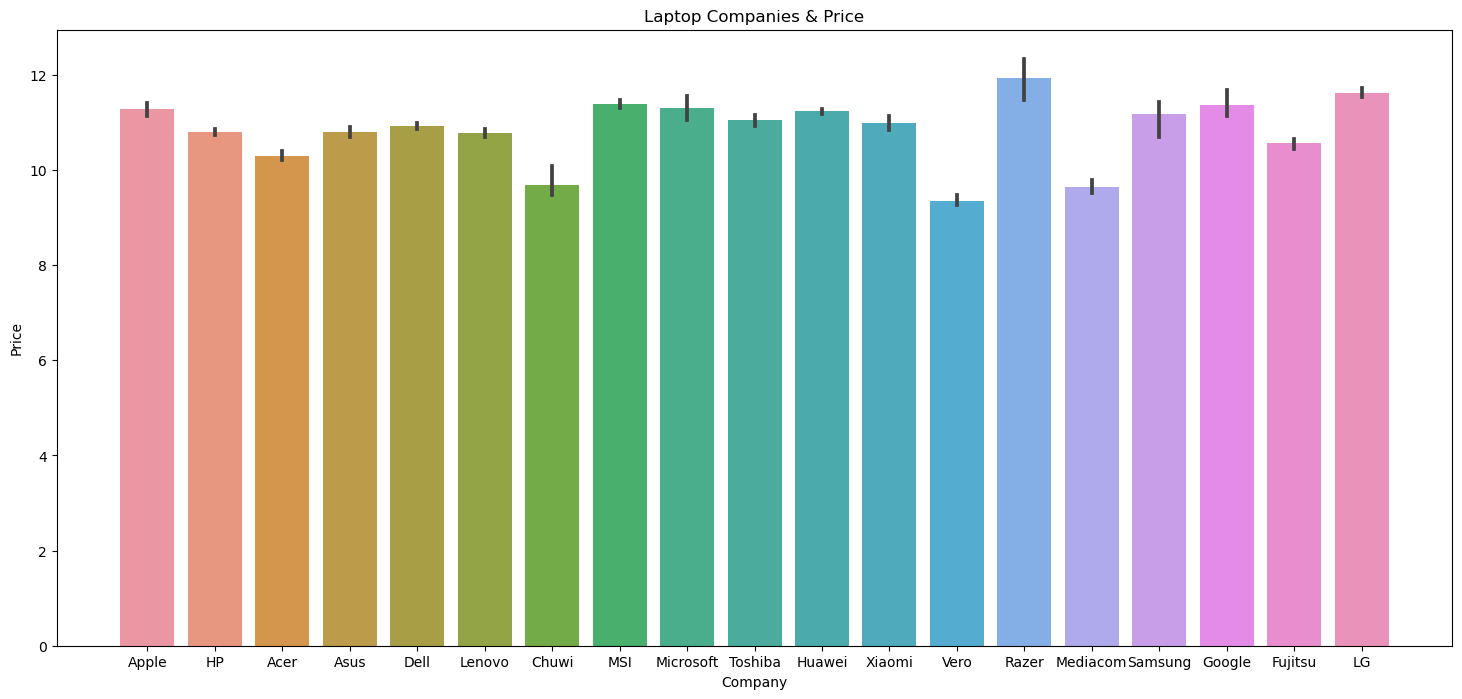

In [12]:
plt.figure(figsize=(18,8))
plt.title("Laptop Companies & Price")
sns.barplot(x=data["Company"],y=data["Price"])
plt.plot()

[]

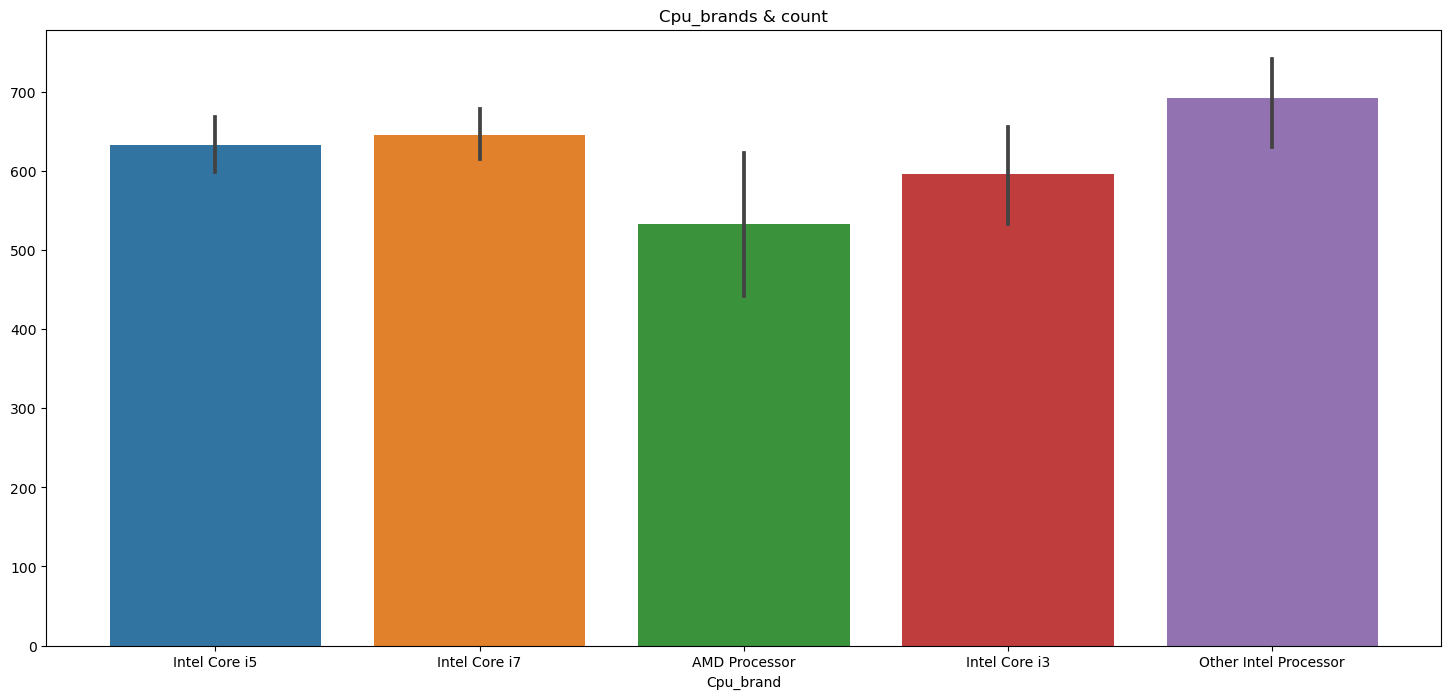

In [13]:
plt.figure(figsize=(18,8))
plt.title("Cpu_brands & count")
sns.barplot(x=data["Cpu_brand"],y=np.arange(1273))
plt.plot()

#### ploting the companies count in the data using histograph 

[]

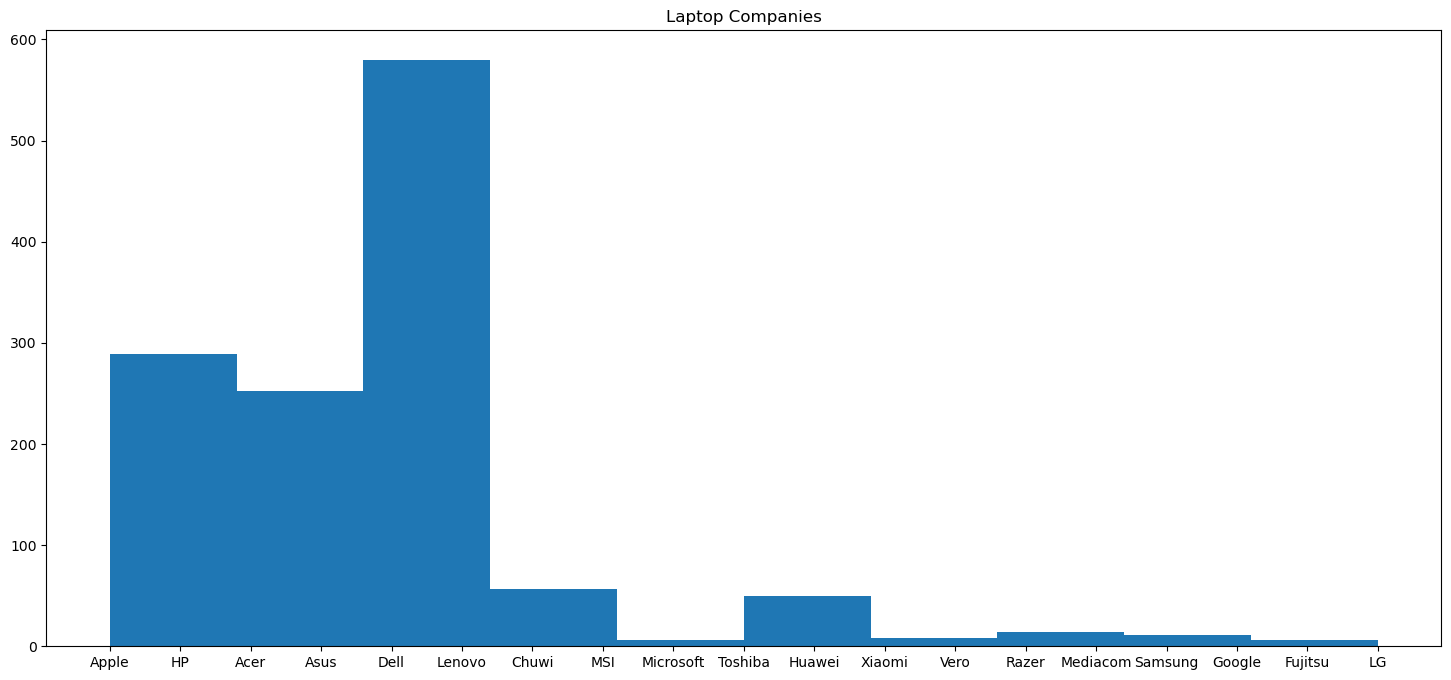

In [14]:
plt.figure(figsize=(18,8))
plt.title("Laptop Companies")
plt.hist(x=data["Company"])
plt.plot()

[]

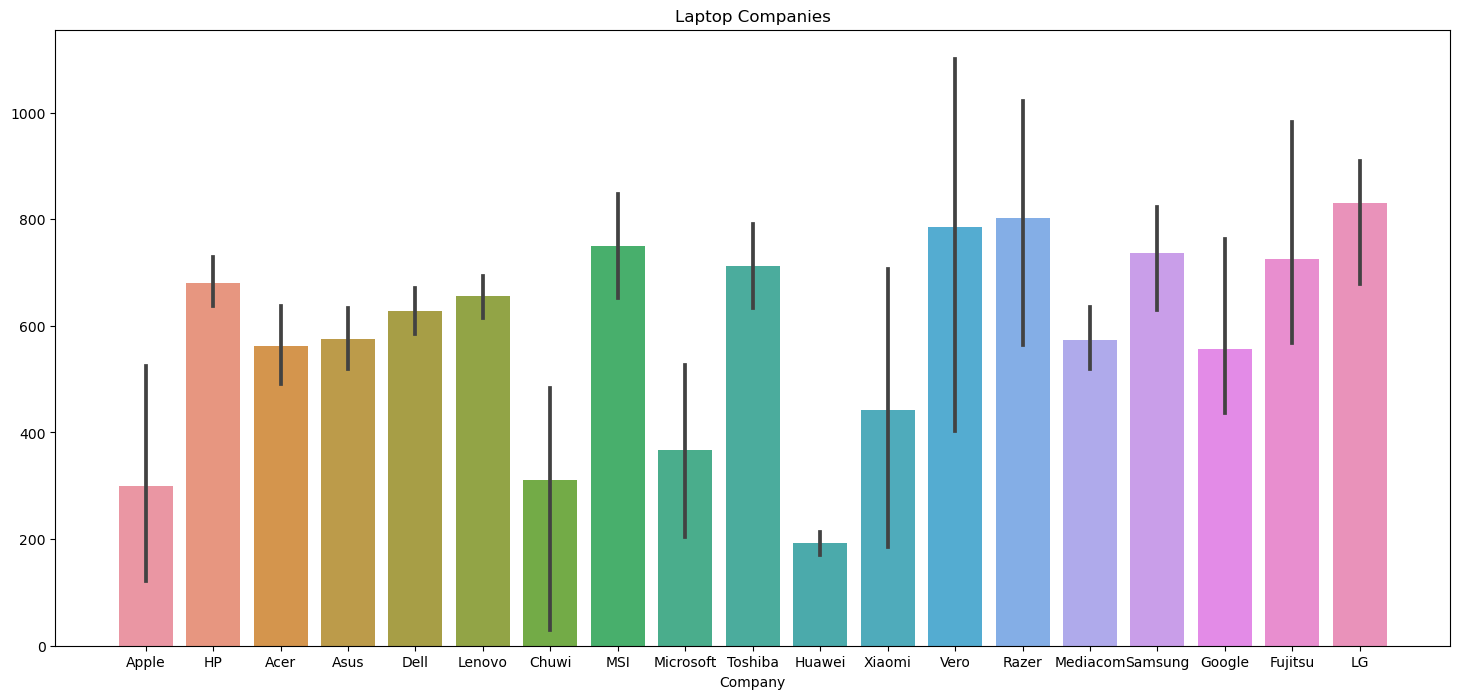

In [15]:
plt.figure(figsize=(18,8))
plt.title("Laptop Companies")
sns.barplot(x=data["Company"],y=np.arange(1273))
plt.plot()

<Axes: xlabel='Company'>

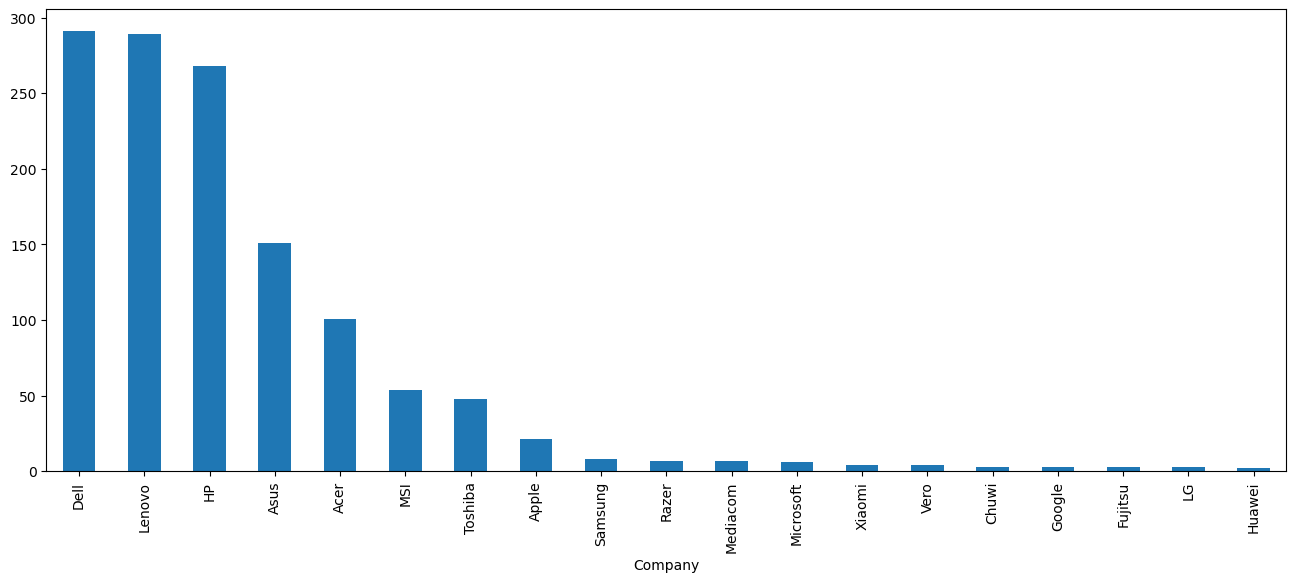

In [16]:
plt.figure(figsize=(16,6))
data.Company.value_counts().plot(kind='bar')

####  ploting the relation between companies and their prices using line graph

[]

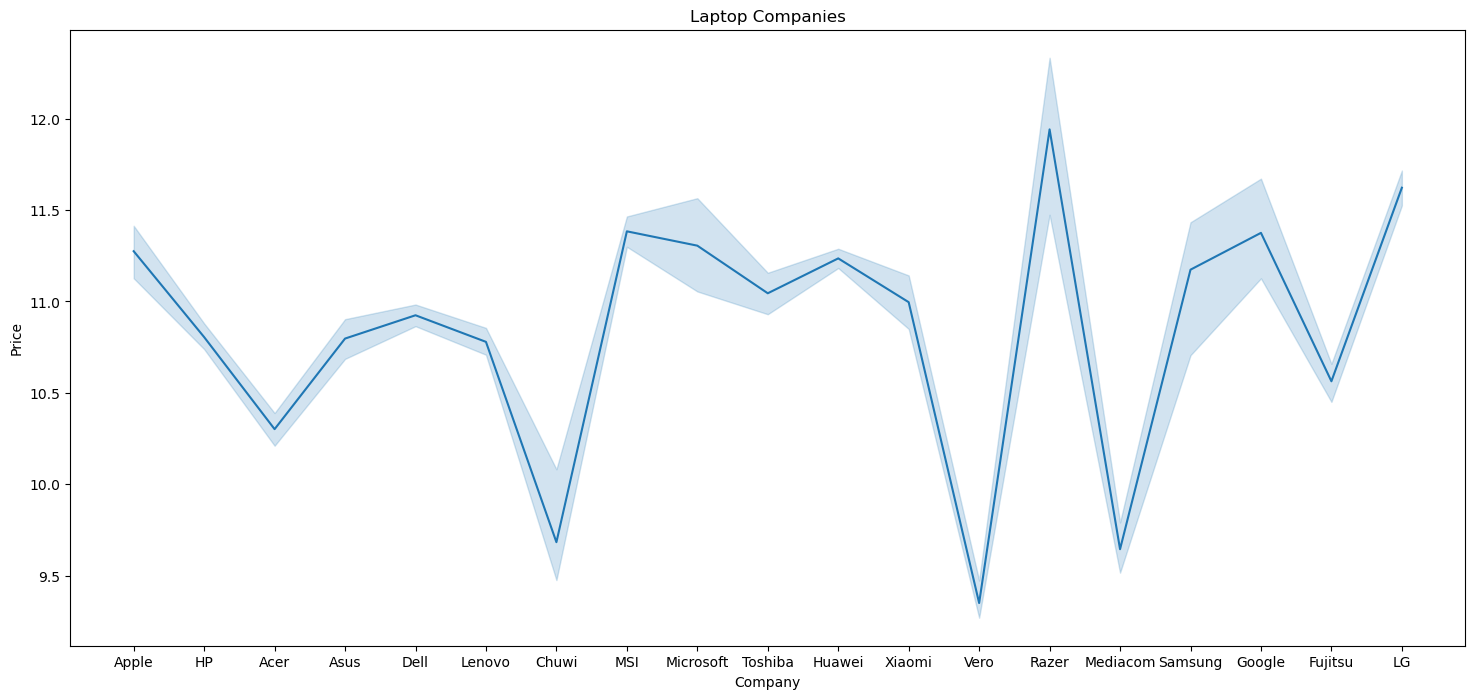

In [17]:
plt.figure(figsize=(18,8))
plt.title("Laptop Companies")
sns.lineplot(x=data["Company"],y=data["Price"])
plt.plot()

[]

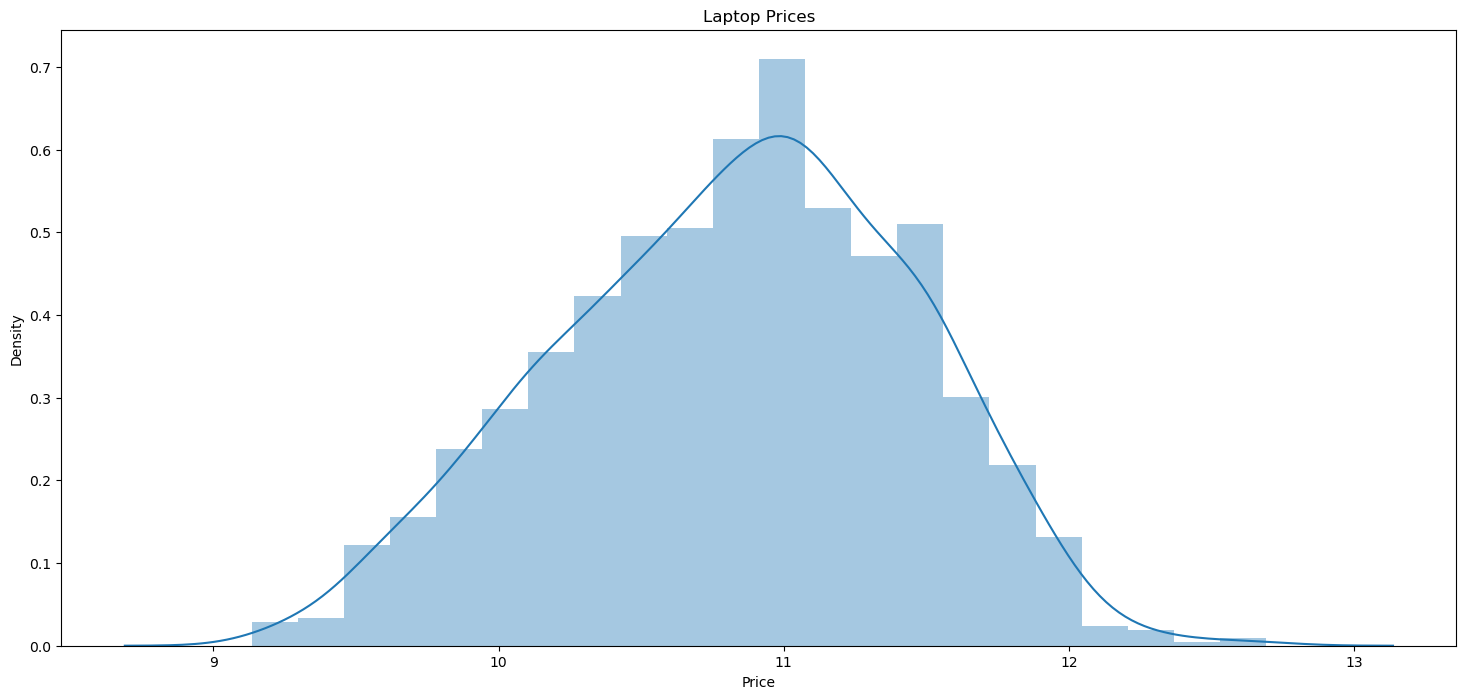

In [18]:
plt.figure(figsize=(18,8))
plt.title("Laptop Prices")
sns.distplot(data["Price"])
plt.plot()

####  detecting and removing duplicate rows

In [19]:
data.duplicated().sum()

1

In [20]:
data.drop_duplicates(keep="first",inplace=True)

In [21]:
data.duplicated().sum()

0

In [22]:
data.head(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [23]:
data["Cpu_brand"]=data["Cpu_brand"].apply(lambda x:x[-3:] if x[0]=="I" else x[:3])

In [24]:
data.head(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,i5,0,256,Intel,Mac


In [25]:
data.tail(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Oth,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10.614129,0,0,100.454670,i7,1000,0,AMD,Windows


### Dell

In [26]:
data_dell=data.loc[data.Company=="Dell"]

In [27]:
data_dell.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
13,Dell,Notebook,4,2.20,10.187967,0,0,141.211998,i3,0,256,AMD,Windows
16,Dell,Notebook,8,2.20,10.588945,0,0,141.211998,i7,0,256,AMD,Windows
19,Dell,Ultrabook,8,1.22,10.862093,1,1,165.632118,i5,0,128,Intel,Windows
23,Dell,2 in 1 Convertible,8,1.62,10.683645,1,0,165.632118,i5,0,256,Intel,Windows
25,Dell,Notebook,4,2.30,10.012572,0,0,100.454670,i3,1000,0,Intel,Windows


###  Lenovo

In [28]:
data_lenovo=data.loc[data.Company=="Lenovo"]

In [29]:
data_lenovo.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
18,Lenovo,Notebook,8,2.20,10.188167,0,0,141.211998,i3,1000,0,Nvidia,Others
21,Lenovo,Gaming,8,2.50,10.882316,0,1,141.211998,i5,1000,128,Nvidia,Windows
35,Lenovo,Notebook,4,1.44,9.493014,0,0,111.935204,Oth,0,0,Intel,Windows
46,Lenovo,Notebook,4,2.20,9.886358,0,0,100.454670,i3,0,128,Intel,Others
50,Lenovo,2 in 1 Convertible,4,0.69,9.740752,1,1,224.173809,Oth,0,0,Intel,Others


### HP

In [30]:
data_hp=data.loc[data.Company=="HP"]

In [31]:
data_hp.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,i5,0,256,Intel,Others
10,HP,Notebook,4,1.86,9.951658,0,0,100.454670,i5,500,0,Intel,Others
11,HP,Notebook,4,1.86,9.819076,0,0,141.211998,i3,500,0,Intel,Others
22,HP,Notebook,4,1.86,9.528521,0,0,100.454670,AMD,500,0,AMD,Others
24,HP,Ultrabook,8,1.91,10.466285,0,0,141.211998,i7,0,256,Intel,Windows


###  combined

In [32]:
combined_data=pd.concat([data_dell,data_lenovo,data_hp],axis=0)

In [33]:
combined_data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
13,Dell,Notebook,4,2.20,10.187967,0,0,141.211998,i3,0,256,AMD,Windows
16,Dell,Notebook,8,2.20,10.588945,0,0,141.211998,i7,0,256,AMD,Windows
19,Dell,Ultrabook,8,1.22,10.862093,1,1,165.632118,i5,0,128,Intel,Windows
23,Dell,2 in 1 Convertible,8,1.62,10.683645,1,0,165.632118,i5,0,256,Intel,Windows
25,Dell,Notebook,4,2.30,10.012572,0,0,100.454670,i3,1000,0,Intel,Windows


In [34]:
combined_data=pd.get_dummies(combined_data,dtype=int)

In [35]:
combined_data.head()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Dell,Company_HP,...,Cpu_brand_ i3,Cpu_brand_ i5,Cpu_brand_ i7,Cpu_brand_AMD,Cpu_brand_Oth,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows
13,4,2.20,10.187967,0,0,141.211998,0,256,1,0,...,1,0,0,0,0,1,0,0,0,1
16,8,2.20,10.588945,0,0,141.211998,0,256,1,0,...,0,0,1,0,0,1,0,0,0,1
19,8,1.22,10.862093,1,1,165.632118,0,128,1,0,...,0,1,0,0,0,0,1,0,0,1
23,8,1.62,10.683645,1,0,165.632118,0,256,1,0,...,0,1,0,0,0,0,1,0,0,1
25,4,2.30,10.012572,0,0,100.454670,1000,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [36]:
y=combined_data["Price"]

In [37]:
x=combined_data.drop("Price",axis=1)

###  LinearRegression

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
for i in range(100):
    for j in range(20,35):
        X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=(j/100),random_state=i)
        reg=LinearRegression()
        reg.fit(X_train,Y_train)
        ypred=reg.predict(X_test)
        r2_score(Y_test,ypred)
        if r2_score(Y_test,ypred)>0.8:
            print(i,j,r2_score(Y_test,ypred))

0 23 0.8010639911836513
0 26 0.8045044205150961
0 27 0.803336125525986
0 28 0.8053512627448434
0 29 0.8066491653198034
6 20 0.803575781497072
6 21 0.8022941847196176
6 22 0.8022430955331468
6 23 0.8076478094439488
6 24 0.8133006947875636
6 25 0.8133300663498515
6 26 0.8162280213677782
6 27 0.8178590001898645
6 28 0.8145359310402993
6 29 0.8140634404284066
6 30 0.8155581242765262
6 31 0.8060103466089836
10 22 0.802776607434597
10 34 0.803359431903955
13 20 0.8017204115192789
13 26 0.8033607814467234
13 27 0.8026976276713429
13 28 0.8032961826010255
13 29 0.8018125200625312
13 30 0.80538355980814
13 31 0.8047068560356206
13 32 0.8034942499489528
13 33 0.806259240165618
13 34 0.8063603110397114
19 20 0.8073852138028925
30 20 0.8003556299181188
30 21 0.8096243301123257
30 22 0.8014549522047977
30 23 0.8009467319331782
34 21 0.8031214234494137
34 22 0.8085412977952653
34 23 0.8091745230184411
34 24 0.8103883686372921
34 34 0.8007191568418937
38 20 0.8006404115138936
38 21 0.8030500731894281

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.21,random_state=91)
reg=LinearRegression()
reg.fit(X_train,Y_train)
ypred=reg.predict(X_test)

In [41]:
ypred

array([10.73689981, 10.2728557 , 10.63742453, 11.08221703, 11.69106531,
       10.15978036, 10.53928398, 10.59754241, 11.08463861, 10.96571809,
       11.06857635, 10.96571809, 11.02540756, 10.37130261, 10.06645095,
       11.19194244, 10.10542314, 10.8641067 , 10.0359598 , 11.96858575,
        9.95520778, 10.87225977, 11.22840382, 10.15786776, 10.89026544,
       10.21834235, 11.74650433, 11.10054016, 10.78171468, 11.20506665,
       10.45132172, 11.30249808,  9.83444255, 12.36390199, 10.70967681,
       10.82157916, 11.28915897, 11.05830272,  9.75123333, 10.73400031,
        9.91646543, 11.0396427 , 10.42644858, 11.74957814, 11.27100863,
       10.58495944, 10.09474868, 10.67946773, 11.36740615, 11.36897712,
       11.57525095, 10.31572264, 10.55891641, 11.22742366, 10.6025231 ,
       11.03560532, 10.52450136, 11.6574938 , 12.28873813, 11.17403612,
       11.34000415, 11.20982934, 11.20457422, 10.86883154, 11.08321859,
       10.46135231, 10.95470909, 10.29658502, 10.61796635, 11.02

In [42]:
r2_score(Y_test,ypred)

0.8244046985383844

In [43]:
mean_squared_error(Y_test,ypred)

0.06391065976718328

In [44]:
len(ypred)

179

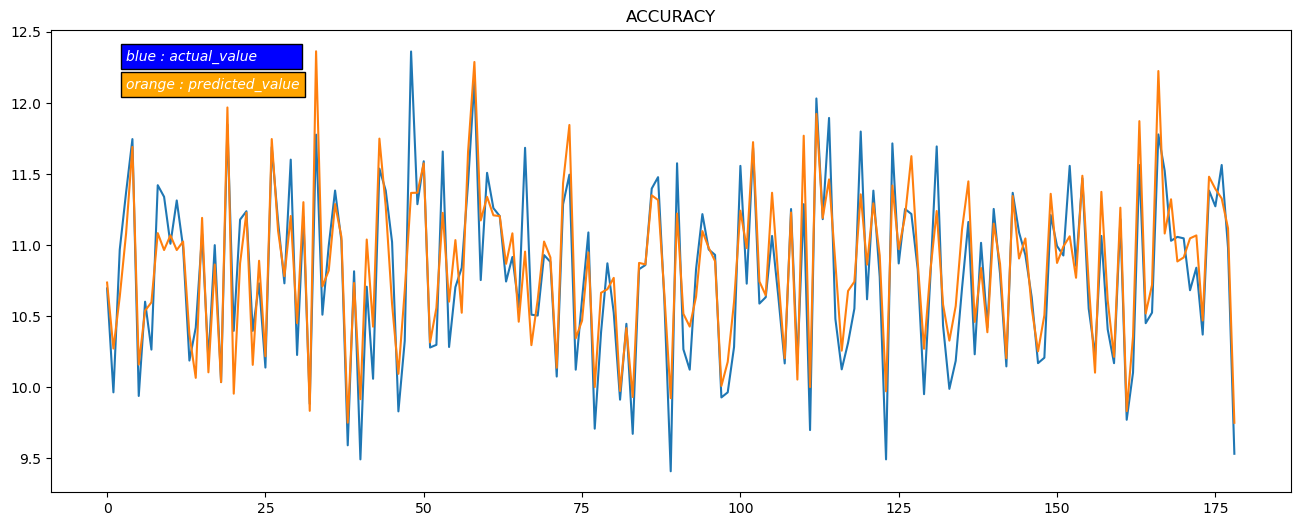

In [45]:
plt.figure(figsize=(16,6))
plt.title("ACCURACY")
plt.text(3,12.3,"blue : actual_value         ",fontsize=10,color="white",fontstyle="italic",bbox=dict(facecolor="blue"))
plt.text(3,12.1,"orange : predicted_value",fontsize=10,color="white",fontstyle="italic",bbox=dict(facecolor="orange"))
x=np.arange(179)
plt.plot(x,Y_test)#blue
plt.plot(x,ypred)#yellow

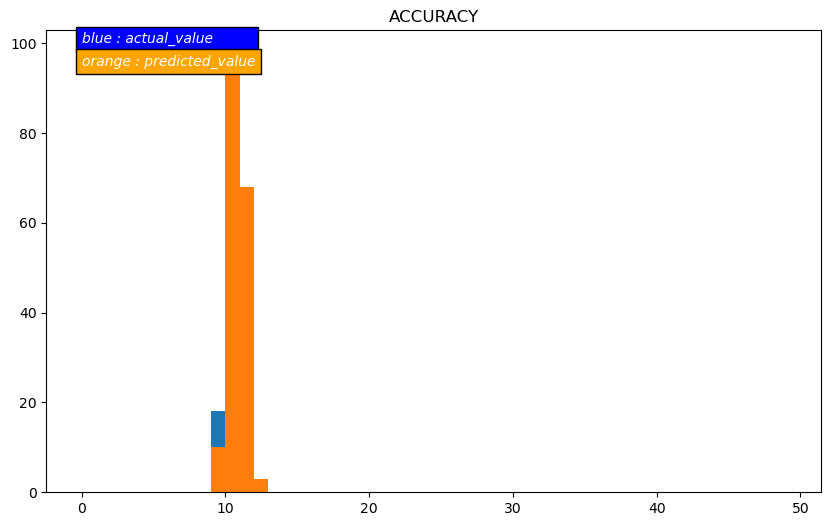

In [46]:
plt.figure(figsize=(10,6))
plt.title("ACCURACY")
x=np.arange(50)
plt.text(0,100,"blue : actual_value         ",fontsize=10,color="white",fontstyle="italic",bbox=dict(facecolor="blue"))
plt.text(0,95,"orange : predicted_value",fontsize=10,color="white",fontstyle="italic",bbox=dict(facecolor="orange"))
plt.hist(Y_test,x)#blue
plt.hist(ypred,x)#yellow
plt.show()

In [47]:
a=8
match(a):
    case 1:print("..")
    case 2:print("__")
    case _:print("working")

working


### Random_Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
reg1=RandomForestRegressor()
reg1.fit(X_train,Y_train)

RandomForestRegressor()

In [50]:
ypred1=reg1.predict(X_test)

In [51]:
ypred1

array([10.7653326 ,  9.92552385, 10.64964815, 11.32053031, 11.95812761,
       10.48128586, 10.7140164 , 10.7395342 , 11.24141036, 11.13437627,
       11.03600288, 11.13437627, 11.06764255, 10.1530979 , 10.32738245,
       11.22108448, 10.26865835, 10.69388439, 10.3520794 , 11.74350448,
        9.97796269, 11.18230683, 11.2684311 ,  9.65045676, 11.06891025,
       10.11464616, 11.61512533, 10.91560607, 10.72942054, 11.38406835,
       10.44679989, 11.33796164,  9.94648466, 11.78224184, 10.52181645,
       10.79098324, 11.36435586, 11.05227788,  9.84705195, 10.88211304,
        9.61238972, 10.76208853, 10.24268482, 11.49488458, 11.33915633,
       10.900318  , 10.08649027, 10.49088023, 11.89546803, 11.34241868,
       11.72242762, 10.2203982 , 10.41500277, 10.62256562, 10.43228594,
       10.97891102, 10.62281021, 11.48454108, 12.0628472 , 10.90547177,
       11.22100584, 11.36932585, 11.33877611, 10.67798882, 11.33589417,
       10.49504872, 11.20486688, 10.47291179, 10.66291246, 11.06

In [52]:
r2_score(Y_test,ypred1)

0.8759885320323388

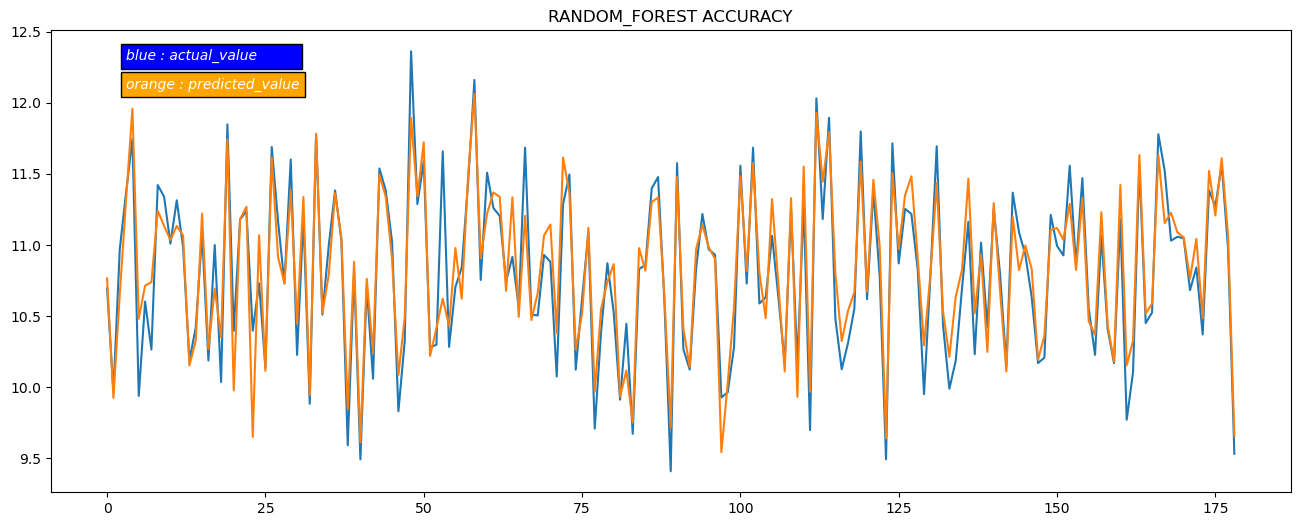

In [53]:
plt.figure(figsize=(16,6))
plt.title("RANDOM_FOREST ACCURACY")
plt.text(3,12.3,"blue : actual_value         ",fontsize=10,color="white",fontstyle="italic",bbox=dict(facecolor="blue"))
plt.text(3,12.1,"orange : predicted_value",fontsize=10,color="white",fontstyle="italic",bbox=dict(facecolor="orange"))
x=np.arange(179)
plt.plot(x,Y_test)#blue
plt.plot(x,ypred1)#yellow